# AutoPocket

_An automated machine learning package for financial analysis_

---


## Table of Contents
1. [Introduction](#introduction)
2. [Installation](#installation)
3. [User Guide](#user-guide)
4. [How It Works](#how-it-works)
   1. [Preprocessing](#preprocessing)
   2. [Algorithms](#algorithms)
      - [Binary Classification](#binary-classification)
      - [Regression](#regression)
   3. [Postprocessing](#postprocessing)
5. [What Do We Do Better Than Competition?](#what-do-we-do-better-than-competition)
6. [Dependencies](#dependencies)


## 🌟 Introduction
This Python package helps users to quickly develop binary classification or regression models for financial data. It supports raw tabular data and provides comprehensive explanation of chosen algorithm.

### Target User Group (3pkt)
### Tool Specialization (4pkt)
### What do we do better than competition? Overview of Existing Solutions (8pkt)

### Comparison: Autopocket vs MLJAR and AutoGluon

In this section, we compare the functionality and benefits of Autopocket against two popular AutoML frameworks: **MLJAR** and **AutoGluon**. While each of these tools excels in specific areas, Autopocket introduces several unique advantages tailored for financial data analysis and model interpretability.

---

#### 1. **Core Features**

| Feature                          | Autopocket                  | MLJAR                             | AutoGluon                      |
|----------------------------------|--------------------------------|-----------------------------------|---------------------------------|
| **Model Types**                  | Supports explainable models like RandomForest, LogisticRegression, and DecisionTree. | Wide variety including ensembles, neural networks, etc. | Extensive model zoo including XGBoost, CatBoost, and neural networks. |
| **Interpretability**             | Strong focus: SHAP, LIME, ICE, PDP. | Basic interpretability, limited SHAP support. | Some SHAP support, but limited focus on interpretability. |
| **Optimization Strategy**        | Fine-tuning via RandomizedSearchCV with 5-fold cross-validation. | Automatic tuning with minimal user control. | Multi-level ensembling and stacking. |
| **Custom Preprocessing**         | Handles financial-specific issues (e.g., decimal separators, date formats). | Basic preprocessing pipeline. | Generic preprocessing for broader data types. |
| **Explanations and Visualizations** | Detailed explanations using LIME, SHAP, and dependency plots. | Limited visual explanations. | Focus on performance metrics; fewer visualizations. |
| **Output Format**                | Saves results in structured PDFs and JSON for further analysis. | Primarily text outputs and basic charts. | Emphasis on leaderboard-style reporting. |

---

#### 2. **Performance and Usability**

| Feature                          | Autopocket                  | MLJAR                             | AutoGluon                      |
|----------------------------------|--------------------------------|-----------------------------------|---------------------------------|
| **Ease of Use**                  | Very simple API: `doJob()` handles the entire pipeline. | User-friendly, but requires configuration for interpretability. | High automation, but API can be complex for customization. |
| **Performance Metrics**          | Customizable metrics with financial relevance (e.g., gini for binary classification). | Predefined metrics for general-purpose tasks. | Comprehensive leaderboard with multiple metrics. |
| **Execution Time**               | Focuses on explainable models, trading speed for interpretability. | Fast due to simpler models but lacks depth in interpretability. | Fast with multi-threaded optimization, but potentially overfits on small datasets. |

---

#### 3. **Comparison by Example on dataset credit.csv**

##### Autopocket:
- **Models Trained**: 4 (e.g., RandomForest, LogisticRegression).
- **Best Model Score**: 0.8387 (roc-auc).
- **Key Strengths**: Comprehensive interpretability via LIME and SHAP. Tailored for financial datasets, offering detailed preprocessing and explanations.
- **Use Case Fit**: Ideal for financial analysts requiring interpretability and actionable insights.

##### MLJAR (mode "Explain"):
- **Models Trained**: Baseline, DecisionTree, RandomForest, and Linear models.
- **Best Model Score**: RandomForest with roc-auc of 0.835444.
- **Key Strengths**: Speed and simplicity. Suitable for regression tasks with quick baseline comparisons.
- **Use Case Fit**: Great for rapid prototyping but lacks in-depth interpretability.

##### AutoGluon:
- **Models Trained**: 14 (e.g., XGBoost, CatBoost, Neural Networks).
- **Best Model Score**: XGBoost with 0.8592 (roc-auc).
- **Key Strengths**: High performance and ensembling. Designed for larger datasets with less concern for interpretability.
- **Use Case Fit**: Preferred for performance-oriented tasks without strict requirements for explanation.

---

#### 4. **Why Autopocket is so unique**

1. **Interpretability First**:
   - Deep integration of SHAP, LIME, ICE, and PDP ensures models are explainable to non-technical stakeholders.
   - Unlike MLJAR and AutoGluon, it emphasizes actionable insights and feature impact visualizations.

2. **Tailored for Financial Data**:
   - Handles domain-specific challenges like inconsistent date formats, decimal separators, and outlier detection.
   - Other frameworks offer generic preprocessing but lack domain-specific expertise.

3. **Simplified Workflow**:
   - A single `doJob()` function minimizes complexity while delivering high-quality results.
   - Users benefit from easy-to-understand outputs (PDFs, JSON) for decision-making.

4. **Focused Model Selection**:
   - Uses only interpretable and widely accepted models in the financial domain (e.g., RandomForest, LogisticRegression).
   - Avoids black-box models that are harder to justify in regulated environments.

---

### Conclusion

While MLJAR and AutoGluon offer fast prototyping and high performance for general machine learning tasks, Autopocket carves out a niche by prioritizing **interpretability**, **financial data handling**, and **domain relevance**. It bridges the gap between performance and actionable insights, making it a valuable tool for financial analysts and decision-makers.




## 📦 Installation
You can install this package using ``` pypi ```
```python
pip install autopocket
```

## 📖 User guide
The syntax is simple. Just import ```AutoPocketor``` and call ```doJob()``` with your data! For example:
```python
from autopocket.main import AutoPocketor

AutoPocketor().doJob(path = "path/to/your/data.csv", target = "target")
```
Our package will do rest for you

## 🤔 How it works?
We have divided the whole process into three main parts:
* Preprocessing
* Algorithms
* Postprocessing

You can find explanation of each part below:

---

### 🔄 Preprocessing

Preprocessing handles and adjusts data with imperfections such as inconsistent date formats, repetitive patterns, unnecessary spaces, missing data, alternating use of commas and periods as decimal separators, redundant columns, inconsistent binary variable formats, and variations in text case. The preprocessing module is divided into three main components: ```Task Analysis```, ```Data Cleaning``` and ```Feature Processing``` which are described below.  

**`Preprocessor`** is a class that combines **Task Analysis**, **Data Cleaning** and **Feature Processing** into a single workflow.


#### 🔍 Task Analysis

The `task_analysing` module includes **`ColumnTypeAnalyzer`** which is responsible for determining the type of machine learning task: **binary classification** or **linear regression**.

#### 🧹 Data Cleaning

The `data_cleaning` module is responsible for handling missing values, correcting data formats, and removing unnecessary or redundant columns.

Tools available in this module:

| Tool                    | Description                                                                 |
|-------------------------|-----------------------------------------------------------------------------|
| `BinaryColumnHandler`   | Ensures consistency in binary column encoding.                              |
| `DataImputer`           | Fills missing values using predefined strategies (mean, median, mode, etc.).|
| `DateHandler`           | Processes date columns, handles different data formats.                     |
| `NumberFormatFixer`     | Fixes inconsistent number formats (e.g., commas vs. periods as separators). |
| `PatternRemover`        | Removes unwanted, repeated patterns.                                        |
| `RedundantColumnRemover`| Identifies and removes redundant columns (e.g., index or same value).       |
| `StringStripper`        | Cleans string columns by removing leading/trailing whitespace.              |
| `StringToLowerConverter`| Converts string data to lowercase for consistency.                          |

All these tools are managed by the `DataCleaner` class, which applies the cleaning steps sequentially.



#### ⚙️ Feature Processing

The `feature_processing` module focuses on transforming the cleaned data into a format suitable for machine learning algorithms. It includes the following tools:

| **Class**           | **Description**                                                                                          |
|---------------------|----------------------------------------------------------------------------------------------------------|
| **`FeatureEncoder`** | Encodes categorical features using one-hot encoding and label encoding for binary features.              |
| **`FeatureSelector`**| Selects relevant features by removing highly correlated ones.                                            |
| **`OutlierHandler`** | Detects and handles outliers using methods like IQR or Isolation Forest.                                  |

The `FeatureProcessor` class manages these steps in data processing.


#### ✨ Example Usage of `Preprocessor`

Below is an example of how to use the `Preprocessor` class to complete preprocessing:

```python
from autopocket.preprocessing.Preprocessor import Preprocessor

# Run preprocessing
X, y, ml_type = Preprocessor().preprocess(path="path/to/your/data.csv", target="your_target_column")
```

---

### 🤖 Algorithms

When preprocessinng is done, the ```Modeller``` chooses the set of used models according to recognized task.
We only use those models that are meant to be explainable and are refered to be commonly used in finance. 

We implement estimators form ```scikit-learn``` package

In both cases, we finetune models using ```sklearn.RandomizedSearchCV()``` on 5 folds. We pick number of iterations depending on the model. 

The best model is the one with the highest score in _proper_ metric.

#### 🧩 Binary classification

In this task, we use _roc-auc_ score to measure estimators' performance. 

We use the following estimators:
* LogisticRegression
* RandomForestClassifier
* RidgeClassifier
* DecisionTreeClassifier


#### 📈 Regression

In this task, we use _negative root mean squared error_ score to measure estimators' performance. 

We use the following estimators:
* LinearRegression (basically Least Squares)
* Lasso
* Ridge
* DecisionTreeRegression
* RandomForestRegression
* ElasticNet
* LassoLarsIC

Before starting to optimize models we also use RandomForest to compute importances of features and compare then with importance of _really_random_variable_. We assume that if _really_random_variable_ is in top 3 most important variable user should check the data. 

Results from this part are saved in ```.json``` files in ```algorithms_results``` directory. 

User can read results using ```autopocket.algorithms.base.BaseSearcher.read_results``` or read model ```autopocket.algorithms.base.BaseSearcher.create_model_from_json```

---

### 💡 Postprocessing

The **Postprocessing** module focuses on interpreting and visualizing the results of the best-performing machine learning model. This step provides insights into model behavior, feature importance, and the decisions it makes.

---

#### 📊 LIME Explanations

LIME (Local Interpretable Model-Agnostic Explanations) provides localized explanations for predictions by approximating the model with interpretable surrogates.

| **Function**                         | **Description**                                                                                                    |
|--------------------------------------|--------------------------------------------------------------------------------------------------------------------|
| `explain_top_observations_with_lime` | Generates LIME explanations for the most influential observations.                                                 |
| `lime_summary_plot`                  | Aggregates feature importance from multiple LIME explanations into a global summary plot.                          |
| `top_features_by_lime_importance`    | Selects top uncorrelated features based on LIME feature importance for detailed visualization and model insights.   |

---

#### ✨ SHAP Explanations

SHAP (SHapley Additive exPlanations) is used for interpreting global and local model behavior, leveraging Shapley values.

| **Function**               | **Description**                                                                                       |
|----------------------------|-------------------------------------------------------------------------------------------------------|
| `explain_with_shap`        | Performs a full SHAP analysis, including summary plots, dependence plots, decision plots, and more.    |
| `shap_summary_plot`        | Visualizes global feature importance using SHAP values. The plot highlights which features contribute most to the model's output, based on the magnitude and distribution of SHAP values across all samples.                                               |
| `shap_dependence`          | Displays interactions between features using dependence plots. These plots show the relationship between a feature's value and its SHAP value, revealing potential interactions.                                    |
| `decisions_binary`         | Creates SHAP decision plots for binary classification tasks, focusing on both best and worst decisions. Best decisions correspond to the highest predicted probabilities, while worst decisions have the largest residuals.|
| `decisions_regression`     | Creates SHAP decision plots for regression tasks. The plots identify instances with the highest and lowest residuals to illustrate model performance.                                                     |
| `forceplot_binary`         | Generates SHAP force plots for individual predictions in binary classification. Force plots are created for the observation with the highest probability for class 1 and the observation with the highest probability for class 0, showing local contributions to the prediction.                       |

---

#### 📈 Partial Dependence and ICE Plots

Partial Dependence Plots (PDPs) and Individual Conditional Expectation (ICE) Plots provide visualizations of the relationship between feature values and model predictions. These visualizations help interpret the global and local impacts of features on model predictions.

| **Function**              | **Description**                                                                                               |
|---------------------------|---------------------------------------------------------------------------------------------------------------|
| `generate_pdp`            | Creates Partial Dependence Plots (PDPs) for the selected features, visualizing their average influence on model predictions. By default, the most important, uncorrelated, non-binary features are shown, but user can specify which features should be visualized on plots.
| `generate_ice`            | Produces Individual Conditional Expectation (ICE) plots for visualizing the effect of feature changes on individual predictions. By default, the most important, uncorrelated, non-binary features are shown, but user can specify which features should be visualized on plots. Supports limiting the number of data samples for better visibility. |

These functions include robust error handling to ensure that invalid or unsupported feature names are excluded and provide meaningful feedback to guide users during plot generation.

#### 🏆 Model Leaderboard

This component compares model performance and provides a ranked summary of all evaluated models.

| **Function**       | **Description**                                                                 |
|--------------------|---------------------------------------------------------------------------------|
| `createLeaderBoard`| Reads the saved model results and generates a leaderboard summarizing performance. |

---

This module ensures transparency and interpretability, making the models ready for critical financial decisions.

## 📦 Dependencies

Performing preprocessing...
X shape: (5859, 62)
Preprocessing done.

Performing modelling...
Performing binary classification
Measuring importances
Top 3 features by importance:
INCOME                    0.125826
AGE                       0.111982
really_random_variable    0.099277
dtype: float64
Fitting 4 models
1 / 4  | Fitting: RandomForestClassifier. Best score: 0.8386509458625975 roc_auc
2 / 4  | Fitting: LogisticRegression. Using ['lbfgs'] solver.Best score: 0.8282429236624289 roc_auc
3 / 4  | Fitting: DecisionTreeClassifier. Best score: 0.7959885919610857 roc_auc
4 / 4  | Fitting: RidgeClassifier. Some models did not converge. Best score: 0.8310209373374484 roc_auc
Saving results to results/algorithms_results
Chosen model: RandomForestClassifier
Modelling done.

Performing postprocessing...
   position              model_name     score                                                                                                                                                  

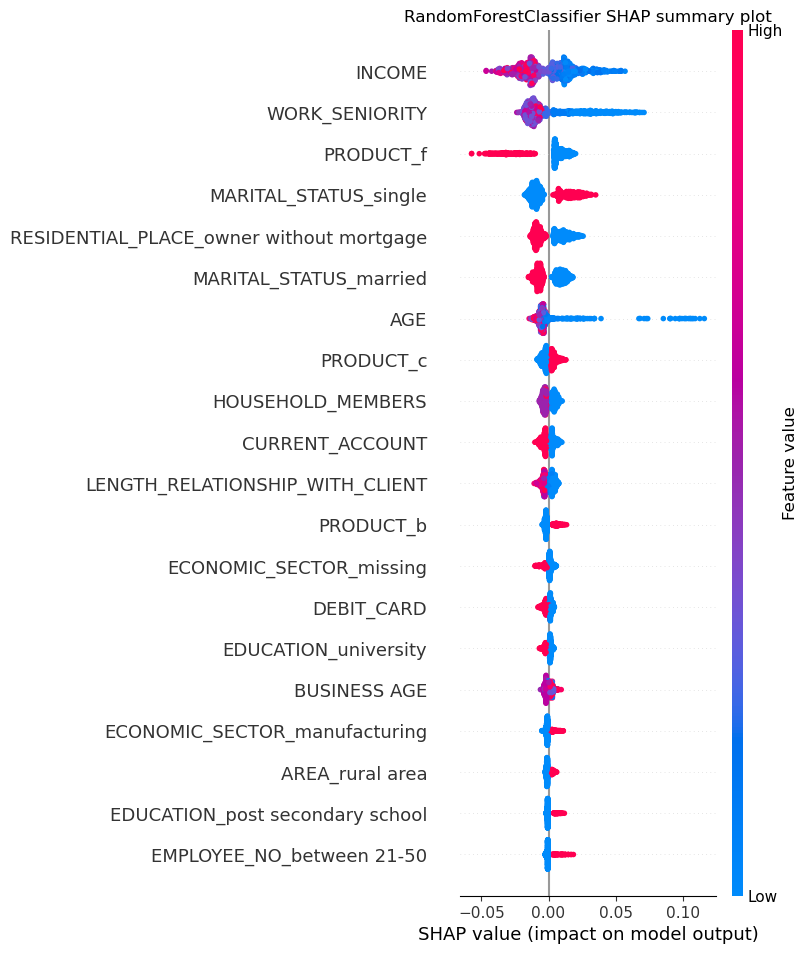

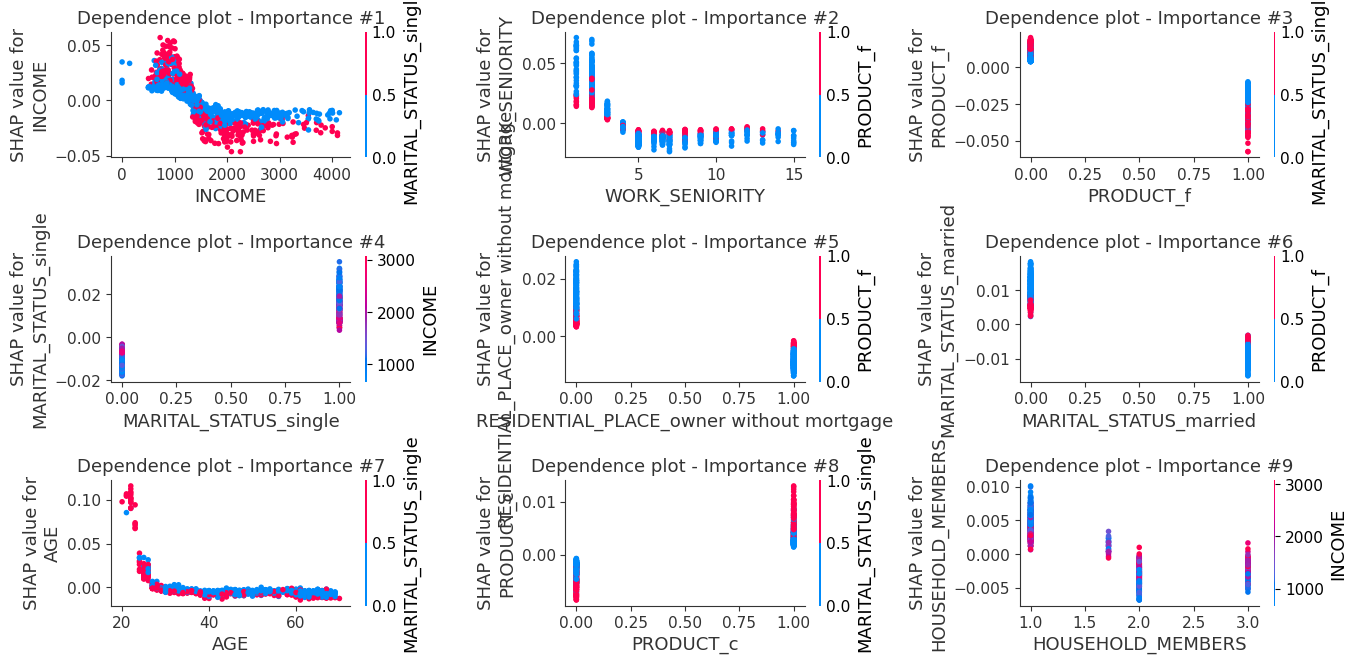

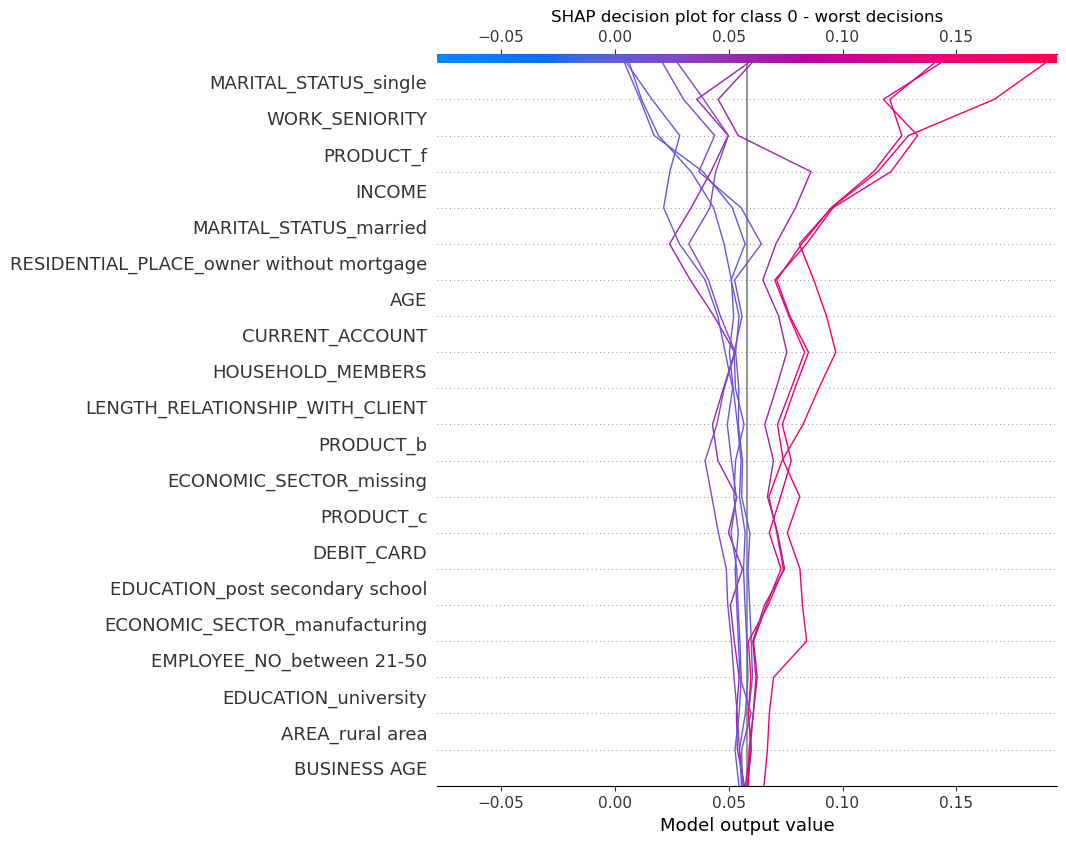

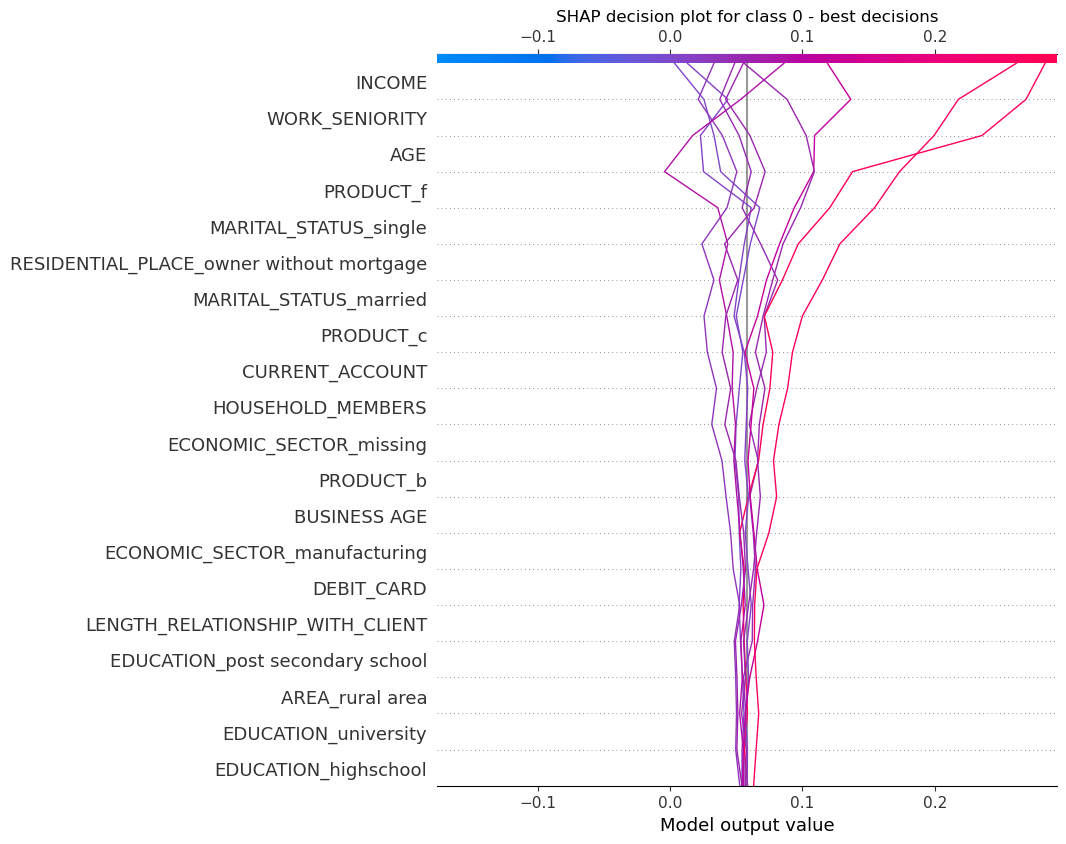

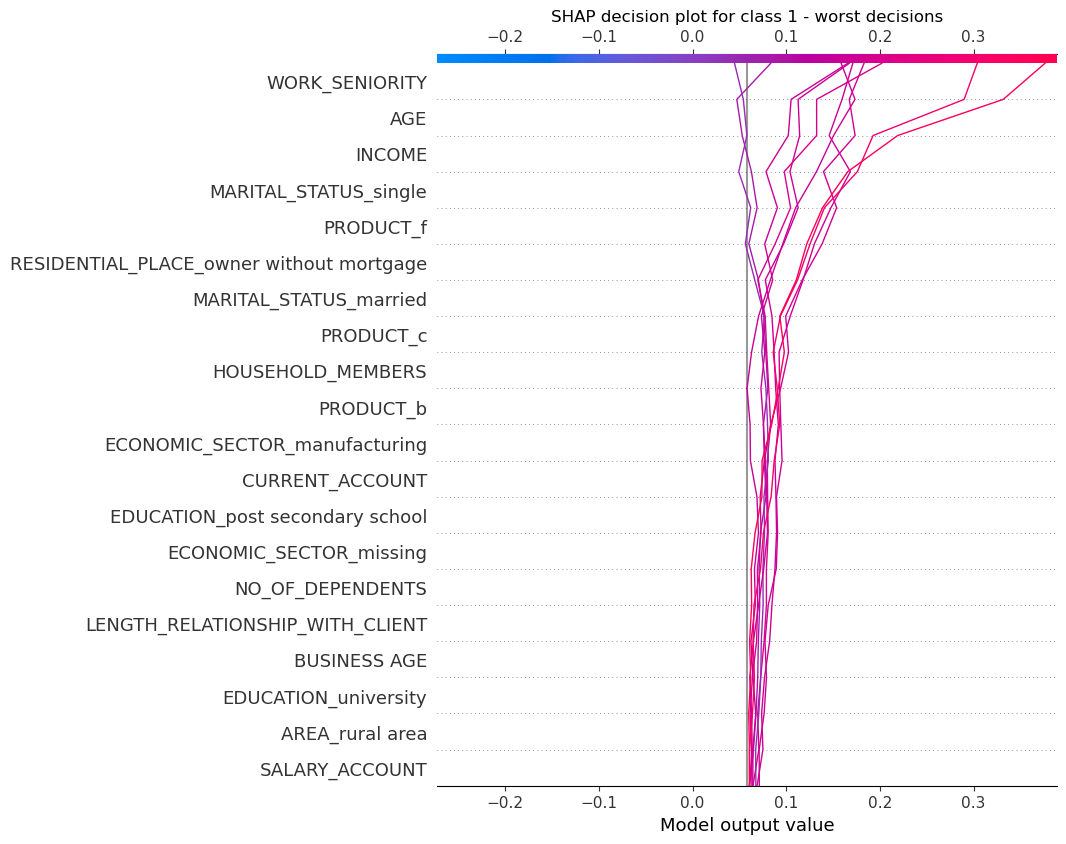

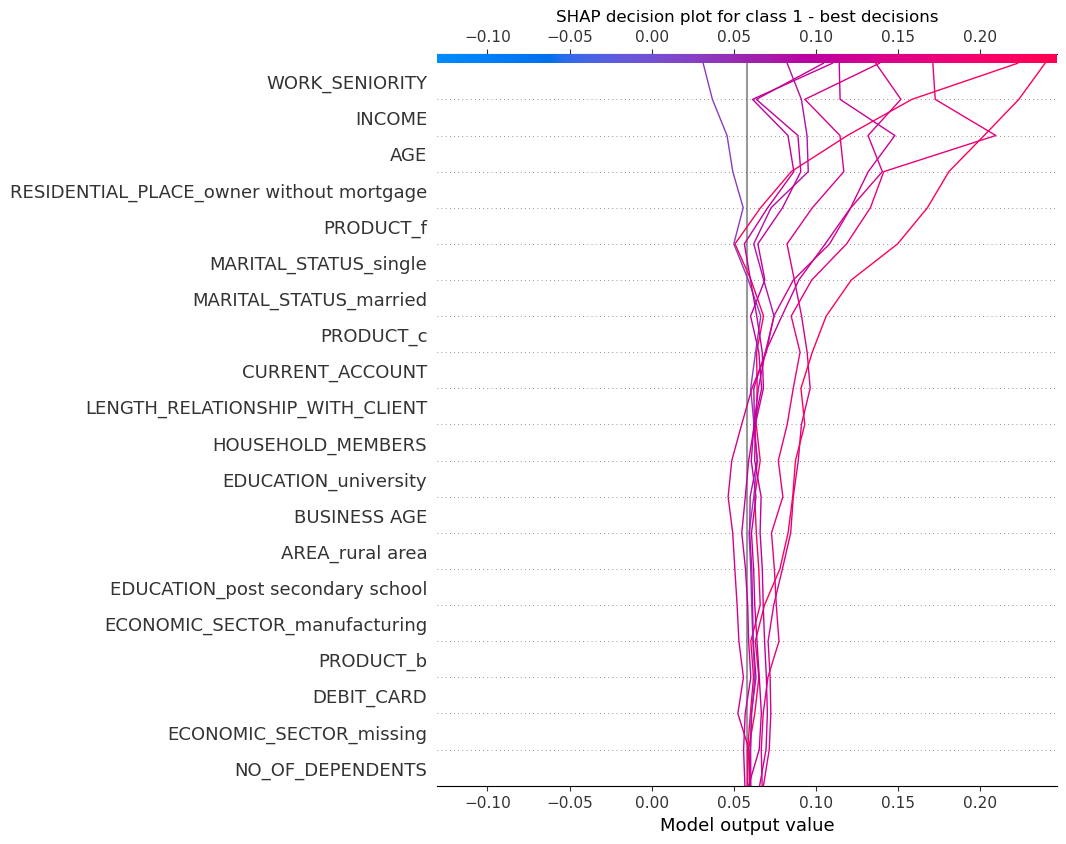

<Figure size 640x480 with 0 Axes>

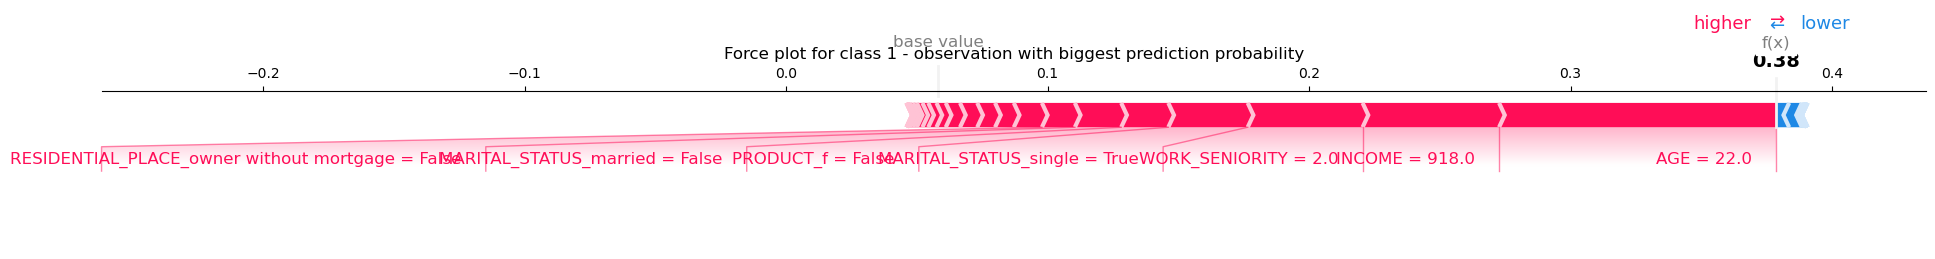

<Figure size 640x480 with 0 Axes>

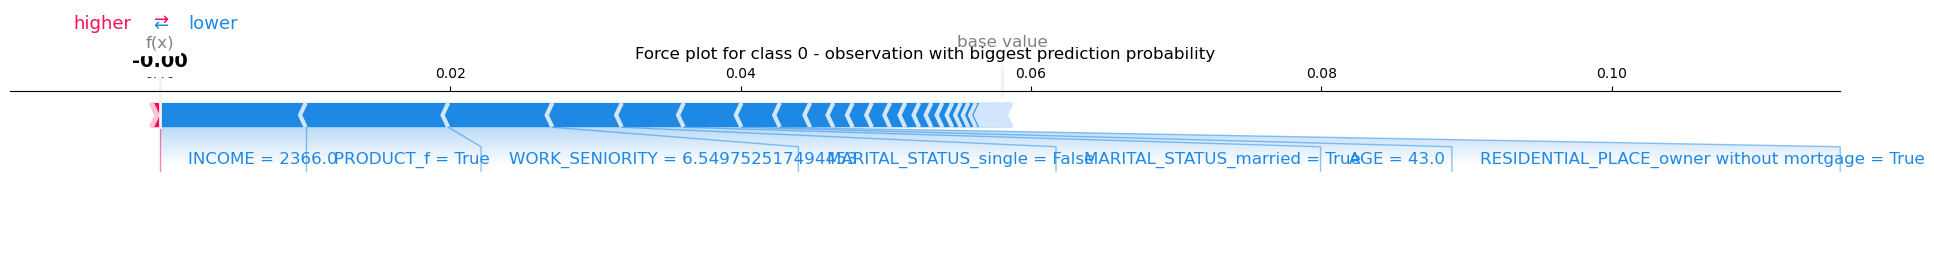

Local explanantions - LIME explanations for the top 2 observations most likely to be class 1 (most influential):


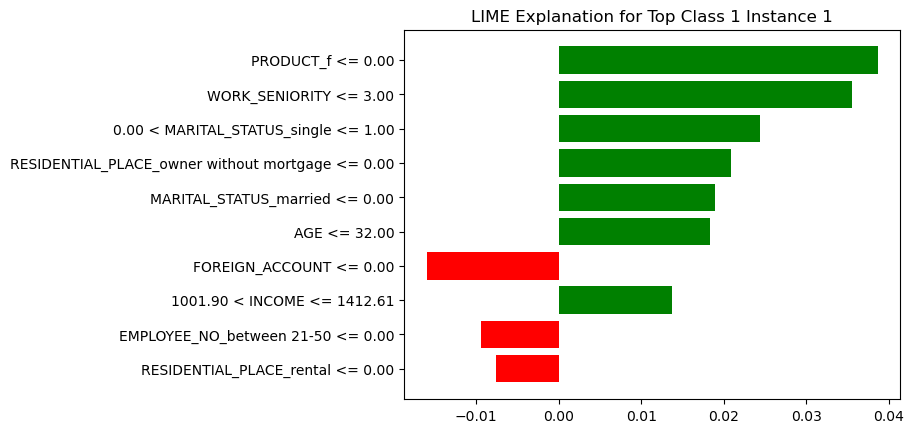

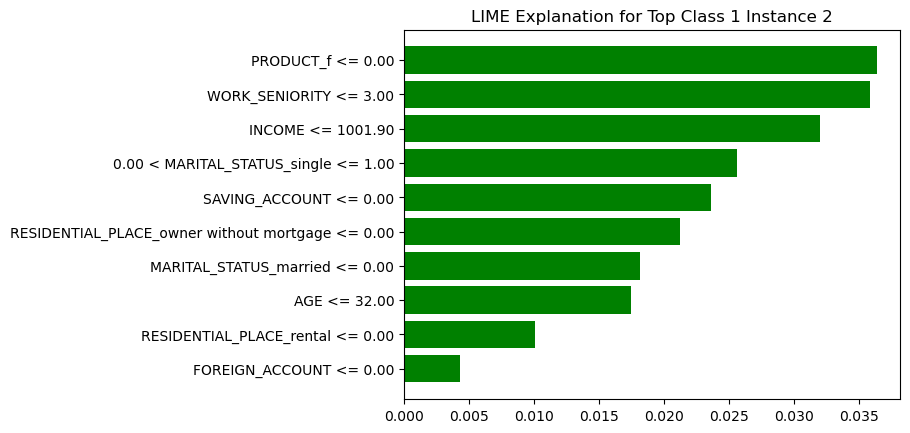

Local explanations - LIME explanations for the top 2 observations most likely to be class 0 (most influential):


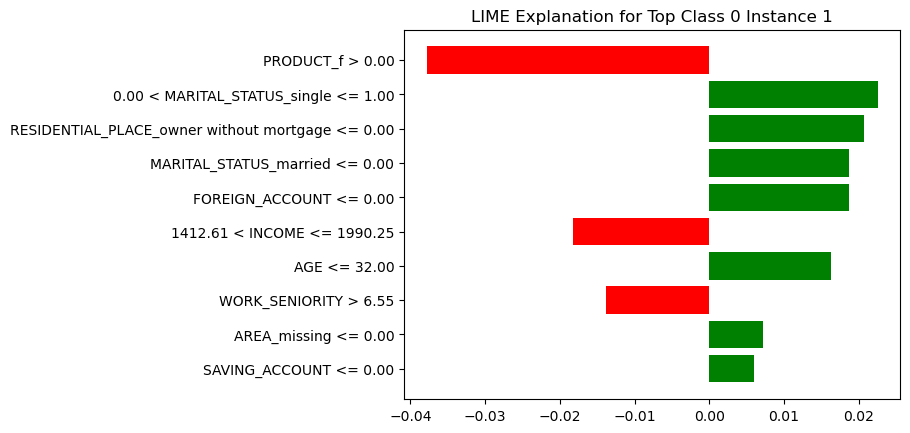

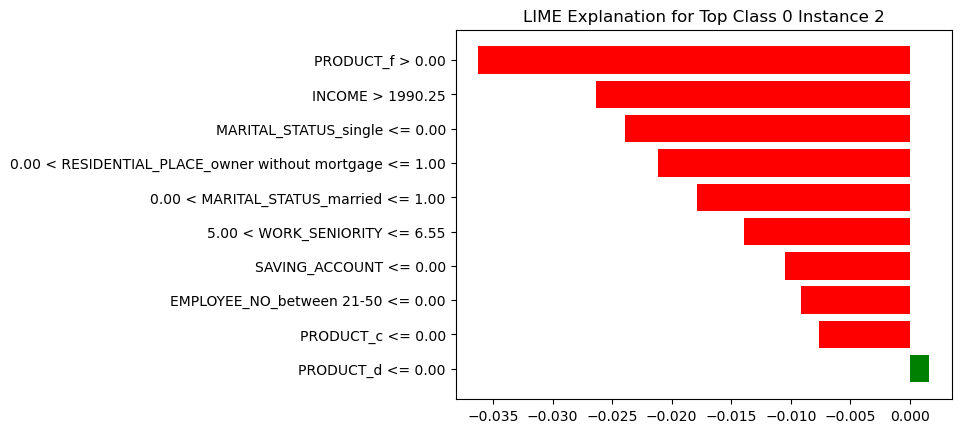

Global explanations - LIME Feature Importance of Top 15 Features:


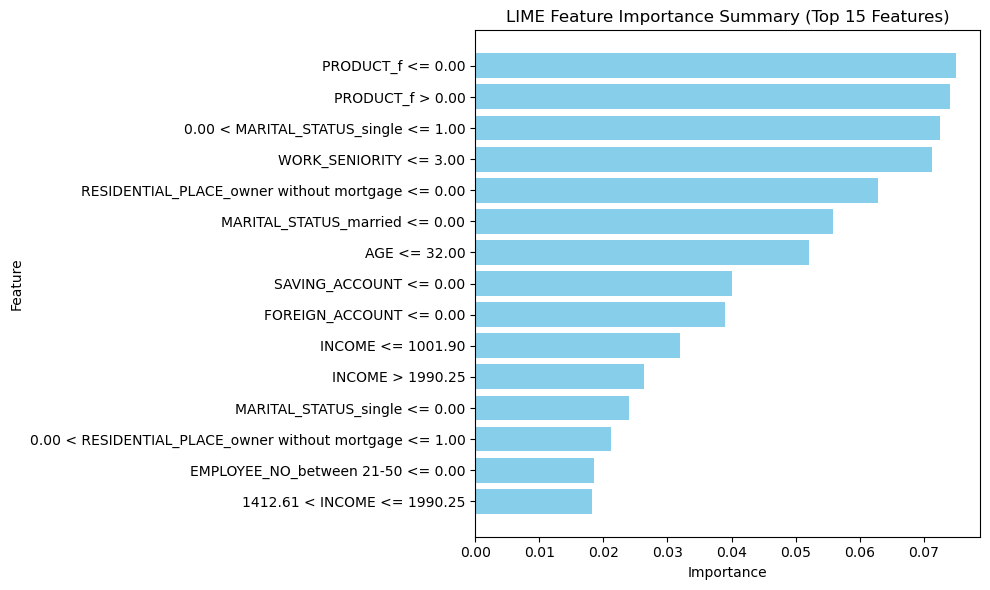

Top 3 non-binary features (uncorrelated): ['WORK_SENIORITY', 'INCOME', 'AGE']
Displaying Partial Dependence Plots for 1 selected non-binary features...
PDP plots for all uncorrelated non-binary features will be saved to the PDF.


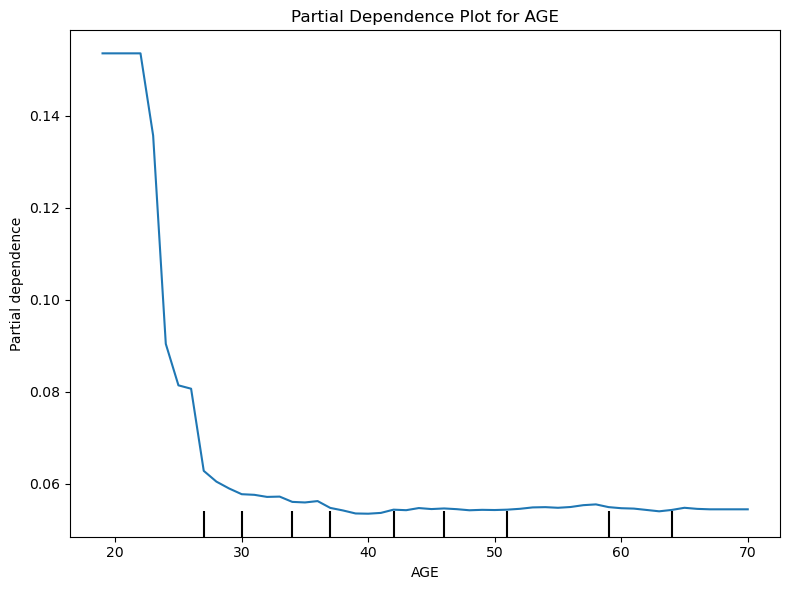

Displaying ICE plots for 1 selected non-binary features...
Using a sample of 58 observations from the input data.
ICE plots for all uncorrelated non-binary features will be saved to the PDF.


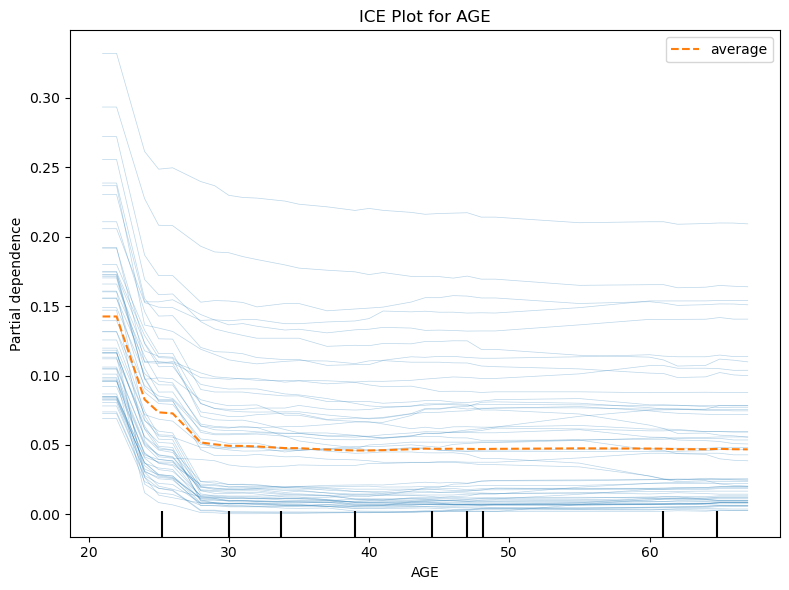

All plots have been saved to c:\Users\macie\OneDrive - Politechnika Warszawska\Pulpit\STUDIA\SEMESTR5\AutoML\Projekty\AutoML-projekt-2\example\results\explanations\explanations_RandomForestClassifier.pdf
Postprocessing done.


In [1]:
import sys
import os

project_path = os.path.abspath('..')
sys.path.append(project_path) 

from autopocket.main import AutoPocketor

AutoPocketor().doJob('data/credit.csv', 'DEFAULT_FLAG', features_for_displaying_plots=['AGE'], subset_fraction_for_ICE_plot=0.01)

Performing preprocessing...
Target distribution:


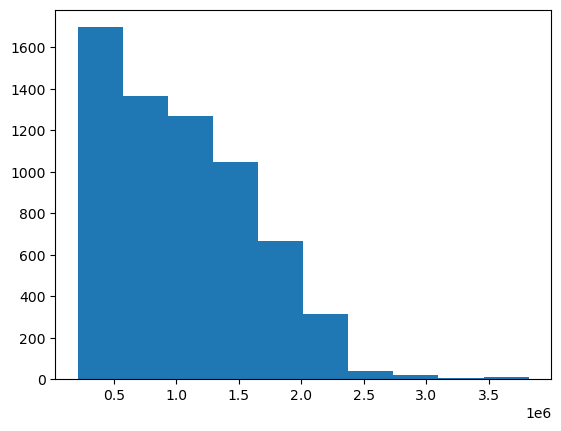

Performing BOX-COX
Target distribution after transformation:


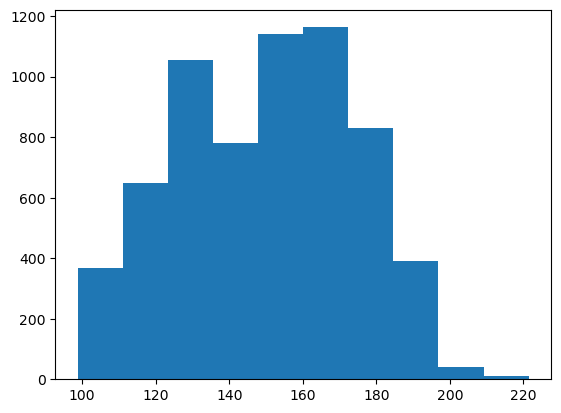

X shape: (6435, 7)
Preprocessing done.

Performing modelling...
Performing regression
Measuring importances
Top 3 features by importance:
Store           0.656233
CPI             0.195513
Unemployment    0.096732
dtype: float64
Fitting 7 models
1 / 7  | Fitting: DecisionTreeRegressor. Best score: -31.230724237146973 neg_root_mean_squared_error
2 / 7  | Fitting: RandomForestRegressor. Best score: -24.270601088699976 neg_root_mean_squared_error
3 / 7  | Fitting: LinearRegression. Best score: -25.27902427371177 neg_root_mean_squared_error
4 / 7  | Fitting: Lasso. Best score: -24.601940908540886 neg_root_mean_squared_error
5 / 7  | Fitting: ElasticNet. Best score: -24.401931047529782 neg_root_mean_squared_error
6 / 7  | Fitting: Ridge. Your data may contain colinear features. Best score: -25.27102627375949 neg_root_mean_squared_error
7 / 7  | Fitting: LassoLarsIC. Best score: -25.25113262142193 neg_root_mean_squared_error
Saving results to results/algorithms_results
Chosen model: RandomFor

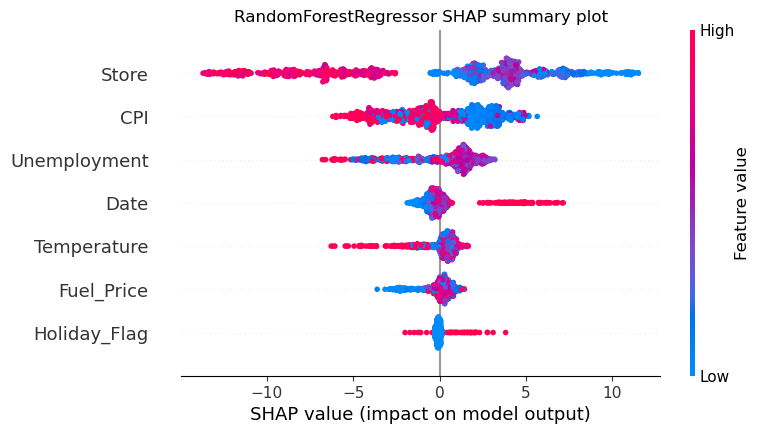

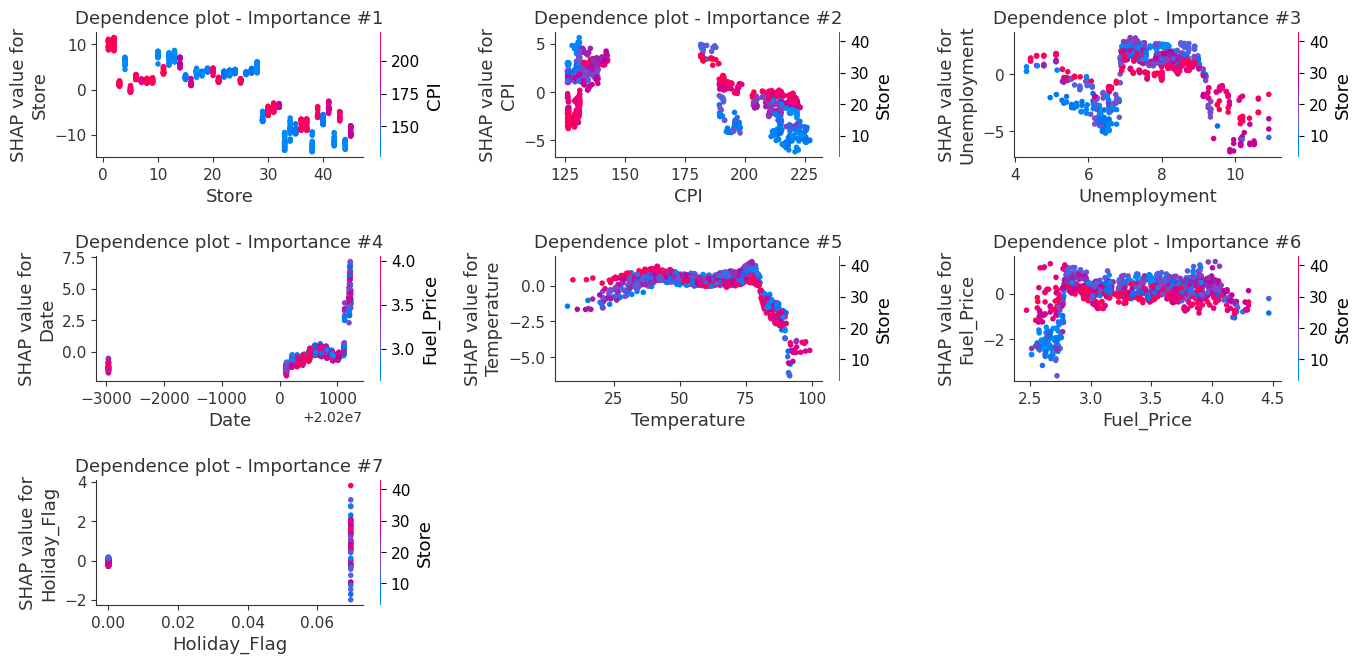

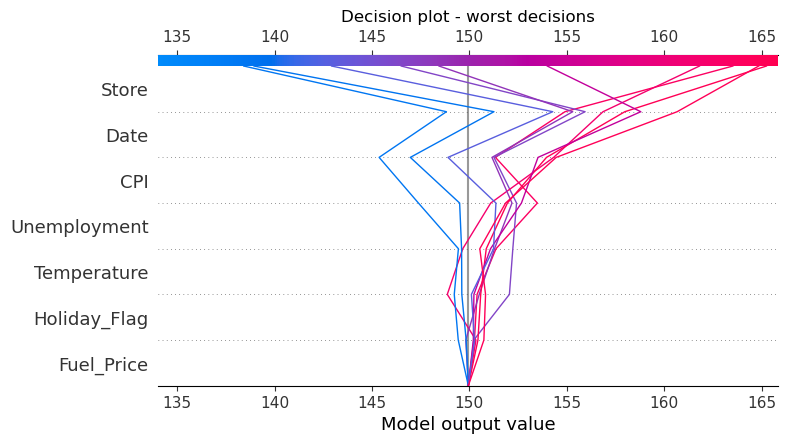

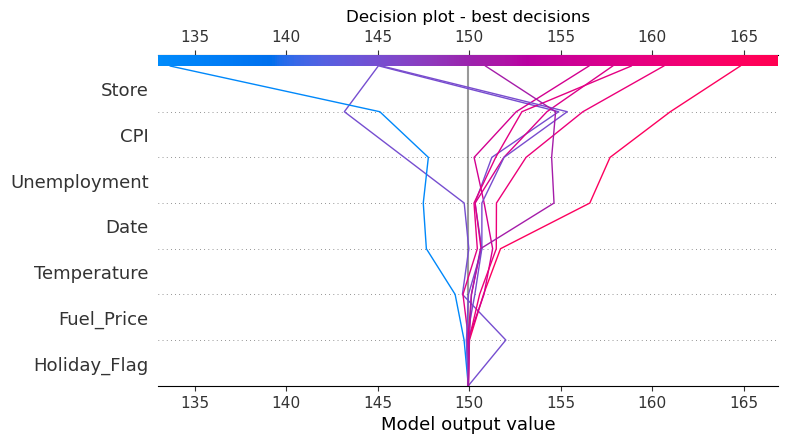

Local explanations - LIME explanations for the top 2 highest predictions (in terms of value of the predicted feature):


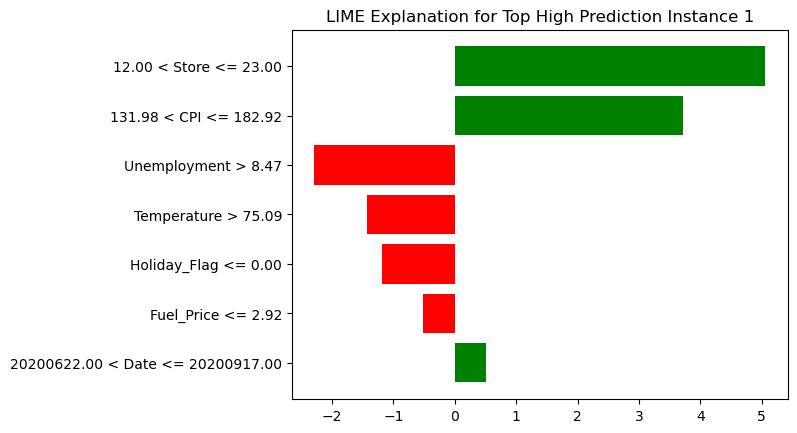

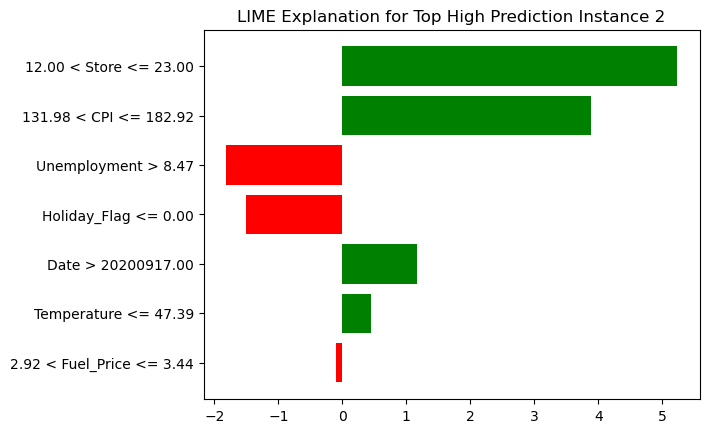

Local explanations - LIME explanations for the top 2 lowest predictions (in terms of value of the predicted feature):


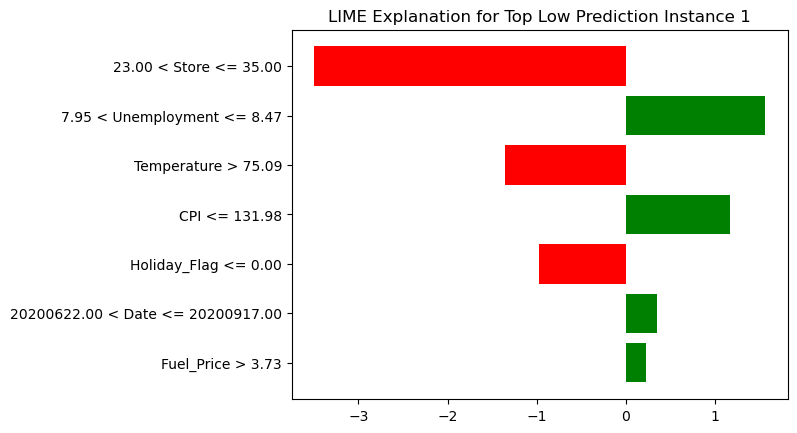

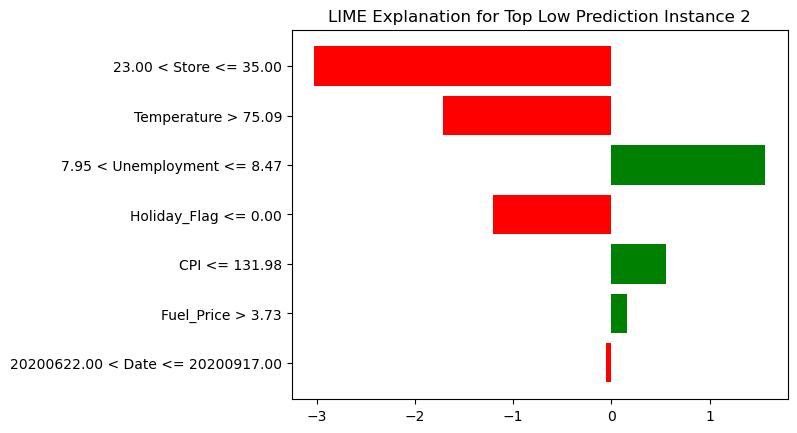

Global explanations - LIME Feature Importance of Top 15 Features:


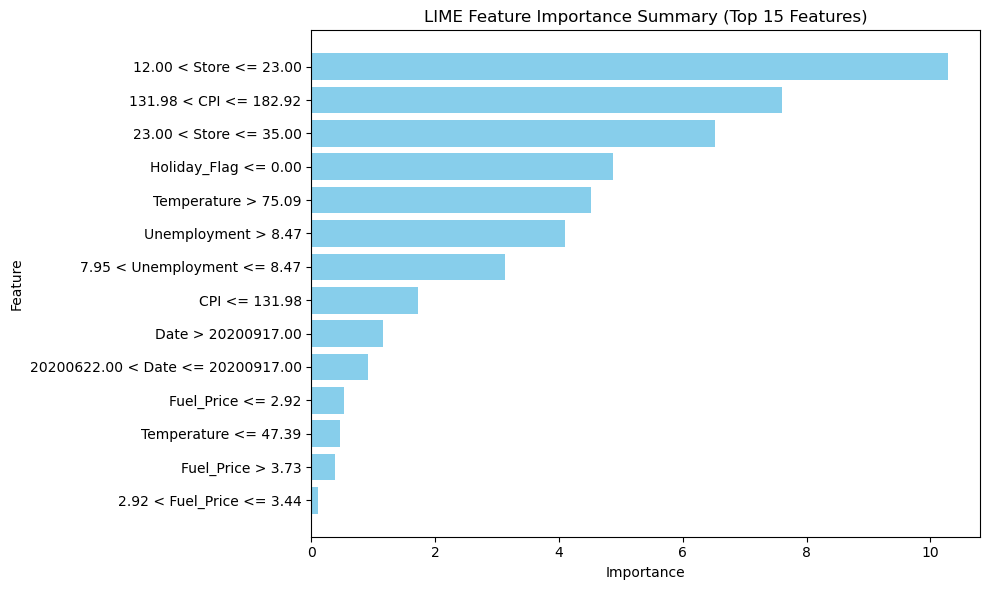

Selecting top features based on LIME Feature Importance...
Top 6 non-binary features (uncorrelated): ['Store', 'CPI', 'Unemployment', 'Temperature', 'Date', 'Fuel_Price']
Displaying Partial Dependence Plots for top 3 non-binary features...
PDP plots for all uncorrelated non-binary features will be saved to the PDF.


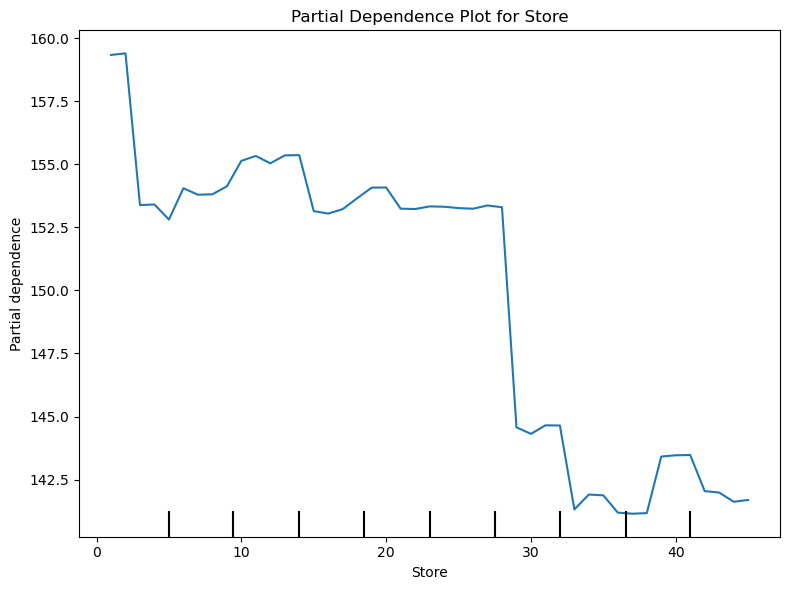

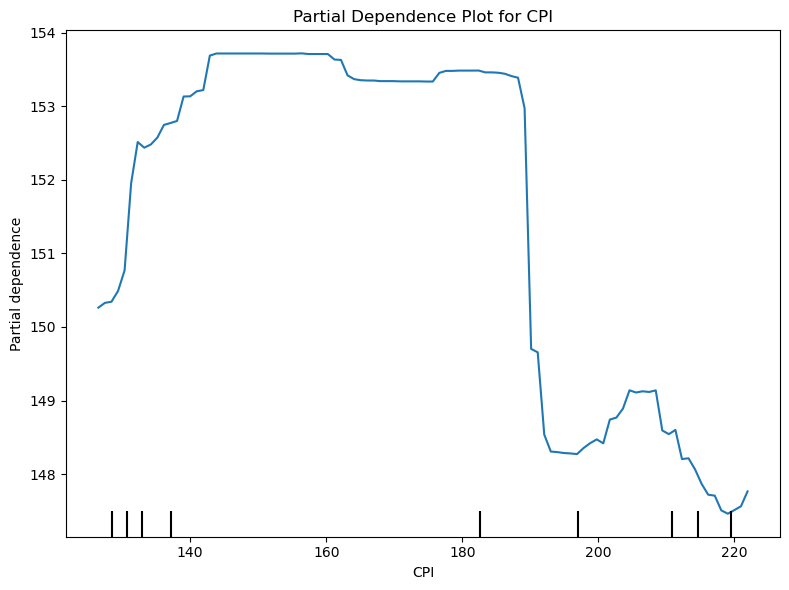

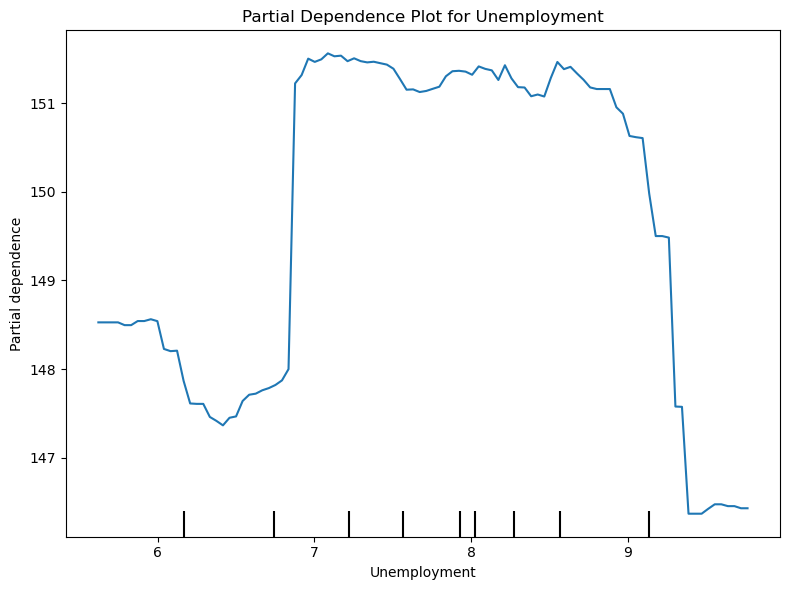

Displaying ICE plots for top 3 non-binary features...
ICE plots for all uncorrelated non-binary features will be saved to the PDF.


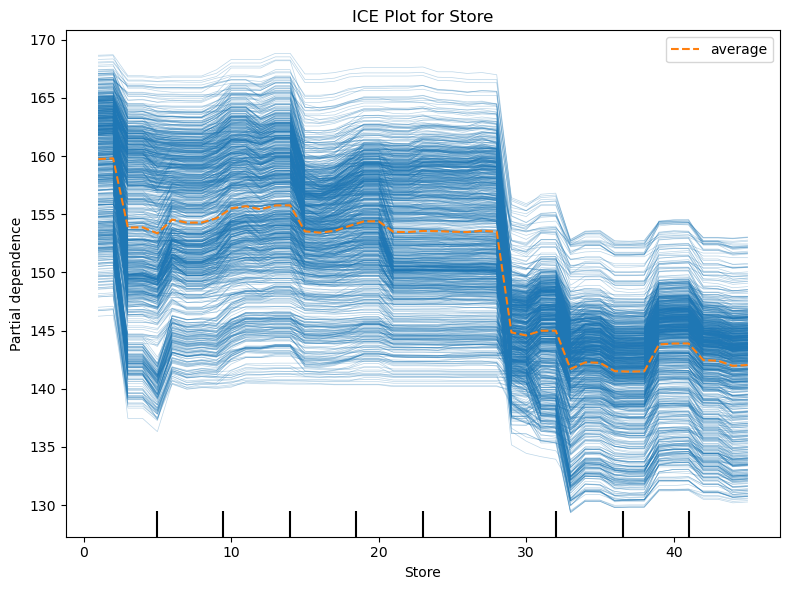

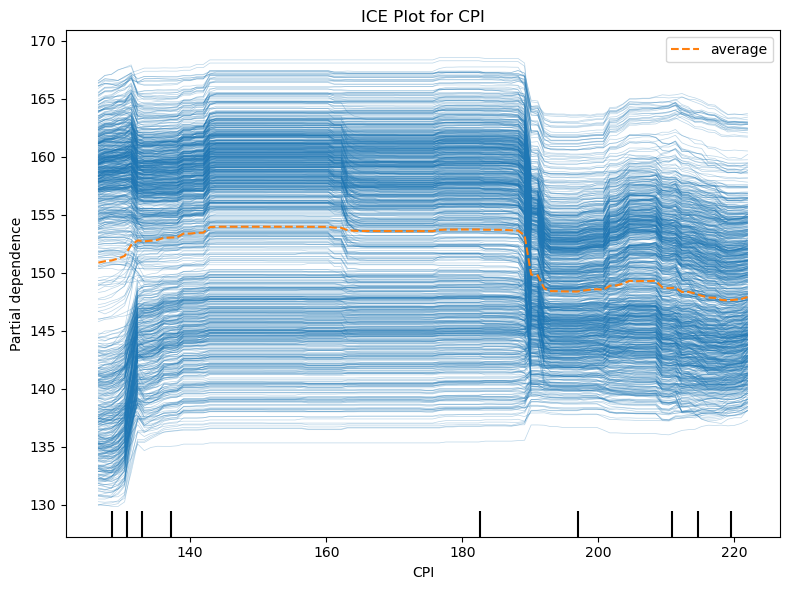

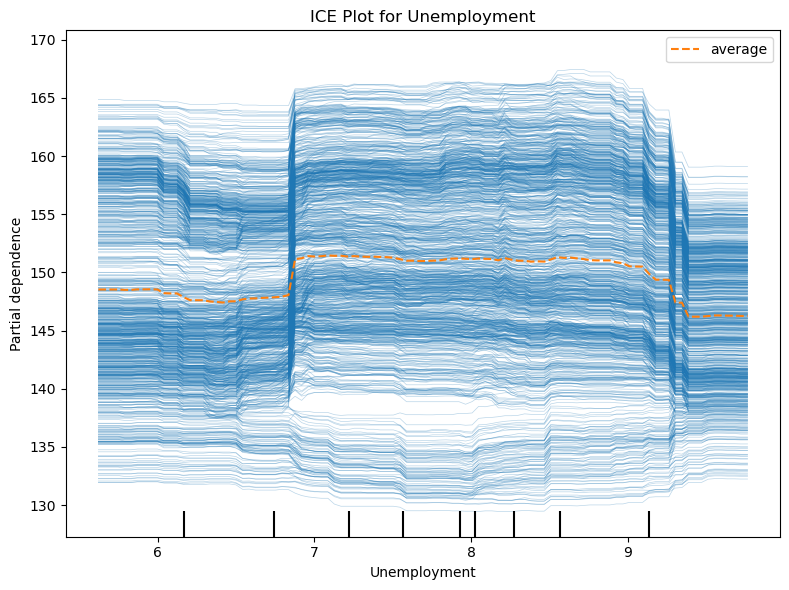

All plots have been saved to c:\Users\macie\OneDrive - Politechnika Warszawska\Pulpit\STUDIA\SEMESTR5\AutoML\Projekty\AutoML-projekt-2\example\results\explanations\explanations_RandomForestRegressor.pdf
Postprocessing done.


In [1]:
import sys
import os

project_path = os.path.abspath('..')
sys.path.append(project_path) 

from autopocket.main import AutoPocketor

AutoPocketor().doJob('data/walmart.csv', 'Weekly_Sales') 